In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
titanic_url = "https://kaggle-getting-started.s3-ap-northeast-1.amazonaws.com/titanic/train.csv"

titanic_df = pd.read_csv(titanic_url)

In [3]:
print(titanic_df.keys())
titanic_df_drop = titanic_df.drop(["PassengerId", "Name", "Ticket"], axis=1)
titanic_value = titanic_df_drop.values
print(titanic_value[:10])

print(titanic_df_drop.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
[[0 3 'male' 22.0 1 0 7.25 nan 'S']
 [1 1 'female' 38.0 1 0 71.2833 'C85' 'C']
 [1 3 'female' 26.0 0 0 7.925 nan 'S']
 [1 1 'female' 35.0 1 0 53.1 'C123' 'S']
 [0 3 'male' 35.0 0 0 8.05 nan 'S']
 [0 3 'male' nan 0 0 8.4583 nan 'Q']
 [0 1 'male' 54.0 0 0 51.8625 'E46' 'S']
 [0 3 'male' 2.0 3 1 21.075 nan 'S']
 [1 3 'female' 27.0 0 2 11.1333 nan 'S']
 [1 2 'female' 14.0 1 0 30.0708 nan 'C']]
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')


In [4]:
#分析Pclass
Pclass_catigories = list(set(titanic_df["Pclass"]))
Pclass_live_count = np.zeros(len(Pclass_catigories))
Pclass_people_count = np.zeros(len(Pclass_catigories))
for i in range(len(titanic_df)):
    if (titanic_df["Survived"].get(i) == 1): Pclass_live_count[titanic_df["Pclass"].get(i) - 1] += 1
    Pclass_people_count[titanic_df["Pclass"].get(i) - 1] += 1

print(Pclass_live_count / Pclass_people_count)



[0.62962963 0.47282609 0.24236253]


In [5]:
#分析性別
sex_catigories = ['male', 'female']
sex_live = np.zeros(2)
sex_count = np.zeros(2)
for i in range(len(titanic_df)):
    if (titanic_df["Survived"].get(i) == 1): sex_live[sex_catigories.index(titanic_df["Sex"].get(i))] += 1
    sex_count[sex_catigories.index(titanic_df["Sex"].get(i))] += 1

print(sex_live / sex_count)

[0.18890815 0.74203822]


[0, 1, 2, 3, 4, 5, 8]
[0.34539474 0.53588517 0.46428571 0.25       0.16666667 0.
 0.        ]


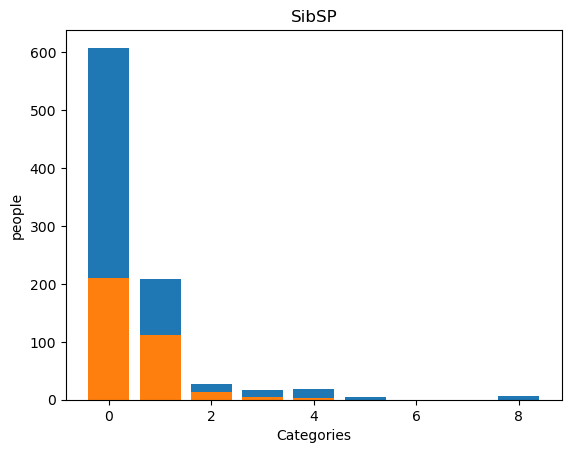

In [6]:
#分析SibSp
SibSP_catigories = list(set(titanic_df["SibSp"]))
print(SibSP_catigories)

SibSP_live = np.zeros(len(SibSP_catigories))
SibSP_die = np.zeros(len(SibSP_catigories))
SibSP_count = np.zeros(len(SibSP_catigories))

for i in range(len(titanic_df)):
    if (titanic_df["Survived"].get(i) == 1): SibSP_live[SibSP_catigories.index(titanic_df["SibSp"].get(i))] += 1
    else: SibSP_die[SibSP_catigories.index(titanic_df["SibSp"].get(i))] += 1
    SibSP_count[SibSP_catigories.index(titanic_df["SibSp"].get(i))] += 1

print(SibSP_live / SibSP_count)





fig, ax = plt.subplots()

# 创建长条图
ax.bar(SibSP_catigories, SibSP_count)
ax.bar(SibSP_catigories, SibSP_live)


# 添加标题和坐标轴标签
ax.set_title('SibSP')
ax.set_xlabel('Categories')
ax.set_ylabel('people')



plt.show()

[0.34365782 0.55084746 0.5        0.6        0.         0.2
 0.        ]


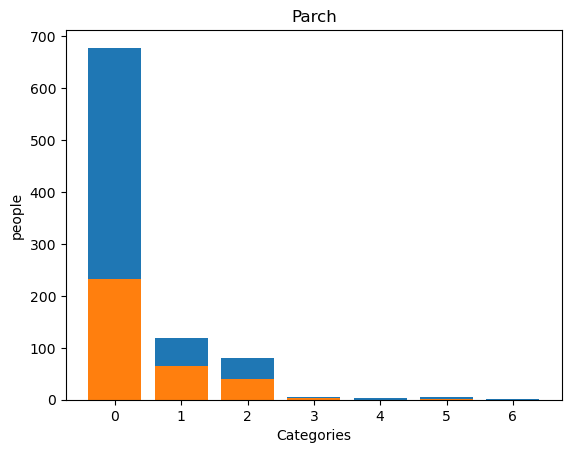

In [7]:
#分析Parch
Parch_catigories = list(set(titanic_df["Parch"].values))

Parch_live = np.zeros(len(Parch_catigories))
Parch_die = np.zeros(len(Parch_catigories))
Parch_count = np.zeros(len(Parch_catigories))

for i in range(len(titanic_df)):
    if (titanic_df["Survived"].get(i) == 1): Parch_live[titanic_df["Parch"].get(i)] += 1
    else: Parch_die[titanic_df["Parch"].get(i)] += 1
    Parch_count[titanic_df["Parch"].get(i)] += 1

print(Parch_live / Parch_count)

fig, ax = plt.subplots()
ax.bar(Parch_catigories, Parch_count)
ax.bar(Parch_catigories, Parch_live)


# 添加标题和坐标轴标签
ax.set_title('Parch')
ax.set_xlabel('Categories')
ax.set_ylabel('people')



plt.show()

continue
continue
continue


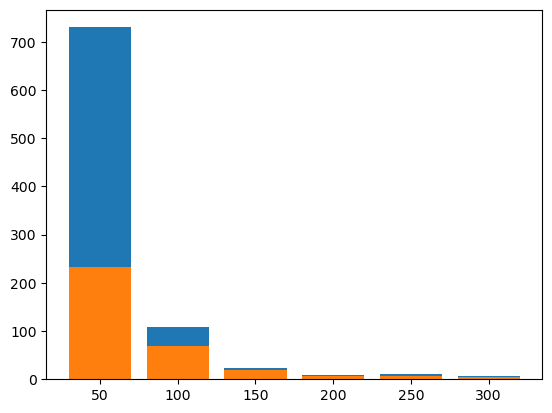

In [8]:
#分析Fare

Fare_catigories = ["50", "100", "150", "200", "250", "300"]

Fare_live = np.zeros(len(Fare_catigories))
Fare_die = np.zeros(len(Fare_catigories))
Fare_count = np.zeros(len(Fare_catigories))

for i in range(len(titanic_df)):

    if (int(titanic_df["Fare"].get(i)) > 300): 
        print("continue")
        continue

    if (titanic_df["Survived"].get(i) == 1): Fare_live[int(titanic_df["Fare"].get(i) / 50)] += 1
    else: Fare_die[int(titanic_df["Fare"].get(i) / 50)] += 1

    Fare_count[int(titanic_df["Fare"].get(i) / 50)] += 1

fig, ax = plt.subplots()

ax.bar(Fare_catigories, Fare_count)
ax.bar(Fare_catigories, Fare_live)

plt.show()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']


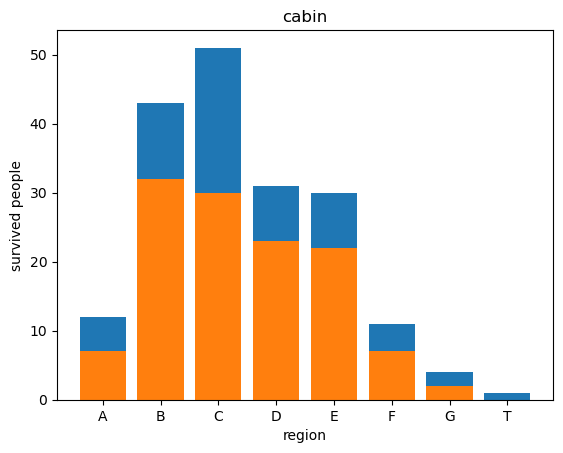

[0.58333333 0.74418605 0.58823529 0.74193548 0.73333333 0.63636364
 0.5        0.        ]


In [9]:
#分析Cabin
Cabin_df = titanic_df["Cabin"].dropna()
Cabin_catigories = list(set(Cabin_df.values))
Cabin_region = []
for c in Cabin_catigories:
    Cabin_region.append(c[0])

Cabin_region = sorted(list(set(Cabin_region)))

print(Cabin_region)


Cabin_live = np.zeros(len(Cabin_region))
Cabin_die = np.zeros(len(Cabin_region))
Cabin_count = np.zeros(len(Cabin_region))

titanic_dropna_df = titanic_df.dropna()
# print(titanic_df)
# print(titanic_dropna_df)

for i in titanic_dropna_df.index:
    
    if (titanic_dropna_df["Survived"].get(i) == 1): Cabin_live[Cabin_region.index(titanic_dropna_df["Cabin"].get(i)[0])] += 1
    else: Cabin_die[Cabin_region.index(titanic_dropna_df["Cabin"].get(i)[0])] += 1
    Cabin_count[Cabin_region.index(titanic_dropna_df["Cabin"].get(i)[0])] += 1

fig, ax = plt.subplots()
ax.bar(Cabin_region, Cabin_count)
ax.bar(Cabin_region, Cabin_live)


ax.set_title("cabin")
ax.set_xlabel("region")
ax.set_ylabel("survived people")

plt.show()

print(Cabin_live / Cabin_count)


C:\Users\weiso131\AppData\Local\Temp\ipykernel_21592\265248822.py:15: RuntimeWarning: invalid value encountered in divide
  ax.bar(age_distribute, age_live/age_count)


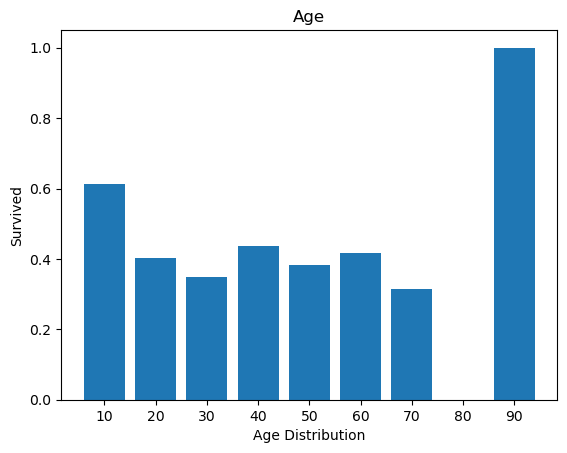

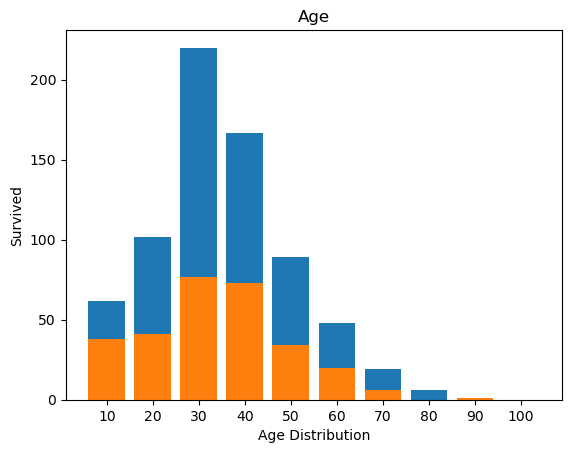

In [10]:
#分析age
age_distribute = ["10", "20", "30", "40" ,"50" ,"60", "70", "80", "90" ,"100"]
age_live = np.zeros(len(age_distribute))
age_die = np.zeros(len(age_distribute))
age_count = np.zeros(len(age_distribute))

for i in range(len(titanic_df)):
    if (str(titanic_df["Age"].get(i)) == "nan"): continue
    if (titanic_df["Survived"].get(i) == 1): age_live[int(titanic_df["Age"].get(i) / 10)] += 1
    else: age_die[int(titanic_df["Age"].get(i) / 10)] += 1
    age_count[int(titanic_df["Age"].get(i) / 10)] += 1

fig, ax = plt.subplots()

ax.bar(age_distribute, age_live/age_count)



ax.set_title("Age")
ax.set_xlabel("Age Distribution")
ax.set_ylabel("Survived")

plt.show()

fig, ax = plt.subplots()

ax.bar(age_distribute, age_count)
ax.bar(age_distribute, age_live)


ax.set_title("Age")
ax.set_xlabel("Age Distribution")
ax.set_ylabel("Survived")

plt.show()

C:\Users\weiso131\AppData\Local\Temp\ipykernel_21592\1746629400.py:15: RuntimeWarning: invalid value encountered in divide
  ax.bar(age_distribute, age_live/age_count)


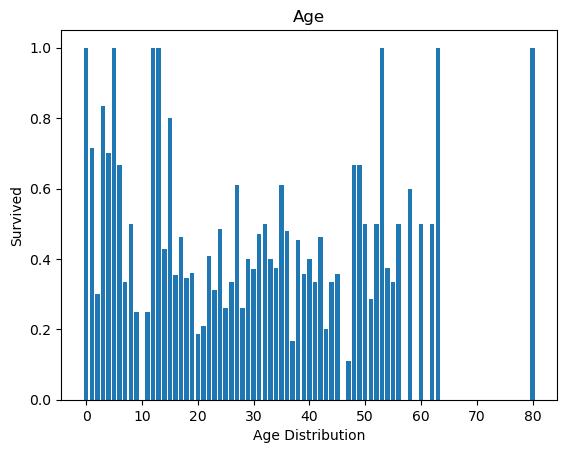

In [11]:
#分析age
age_distribute = list(range(100))
age_live = np.zeros(len(age_distribute))
age_die = np.zeros(len(age_distribute))
age_count = np.zeros(len(age_distribute))

for i in range(len(titanic_df)):
    if (str(titanic_df["Age"].get(i)) == "nan"): continue
    if (titanic_df["Survived"].get(i) == 1): age_live[int(titanic_df["Age"].get(i))] += 1
    else: age_die[int(titanic_df["Age"].get(i))] += 1
    age_count[int(titanic_df["Age"].get(i))] += 1

fig, ax = plt.subplots()

ax.bar(age_distribute, age_live/age_count)



ax.set_title("Age")
ax.set_xlabel("Age Distribution")
ax.set_ylabel("Survived")

plt.show()

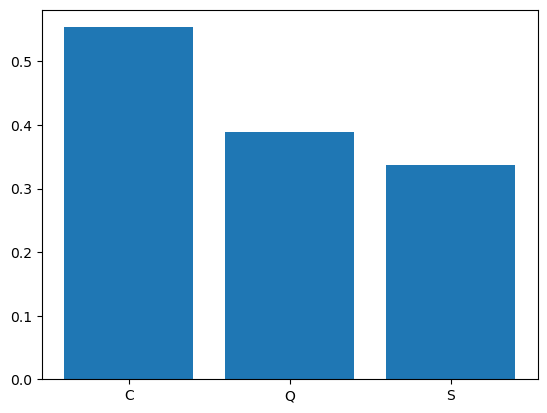

[0.55357143 0.38961039 0.33695652]


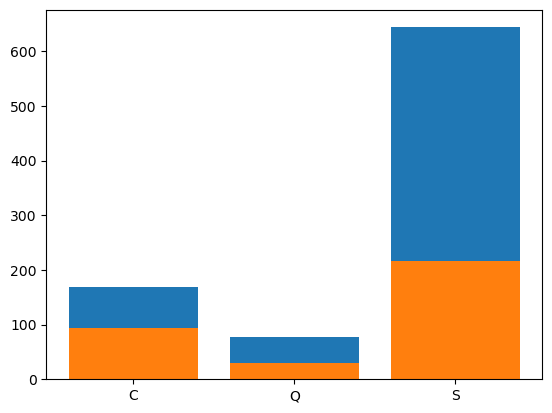

In [12]:
#分析Embarked
Embarked_catigories = ['S', 'Q', 'C']
Embarked_catigories = sorted(Embarked_catigories)
Embarked_live = np.zeros(len(Embarked_catigories))
Embarked_die = np.zeros(len(Embarked_catigories))
Embarked_count = np.zeros(len(Embarked_catigories))

for i in range(len(titanic_df)):
    if (str(titanic_df["Embarked"].get(i)) == "nan"): continue

    if (titanic_df["Survived"].get(i) == 1): Embarked_live[Embarked_catigories.index(titanic_df["Embarked"].get(i))] += 1
    else: Embarked_die[Embarked_catigories.index(titanic_df["Embarked"].get(i))] += 1
    Embarked_count[Embarked_catigories.index(titanic_df["Embarked"].get(i))] += 1

fig, ax = plt.subplots()

ax.bar(Embarked_catigories, Embarked_live/Embarked_count)


plt.show()

print(Embarked_live/Embarked_count)

fig, ax = plt.subplots()

ax.bar(Embarked_catigories, Embarked_count)
ax.bar(Embarked_catigories, Embarked_live)

plt.show()

total people:168
mean: 59.95414404761905
median: 29.7


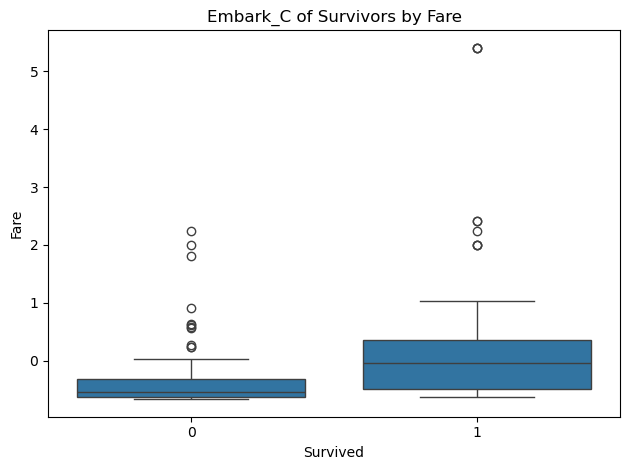

total people:77
mean: 13.276029870129872
median: 7.75


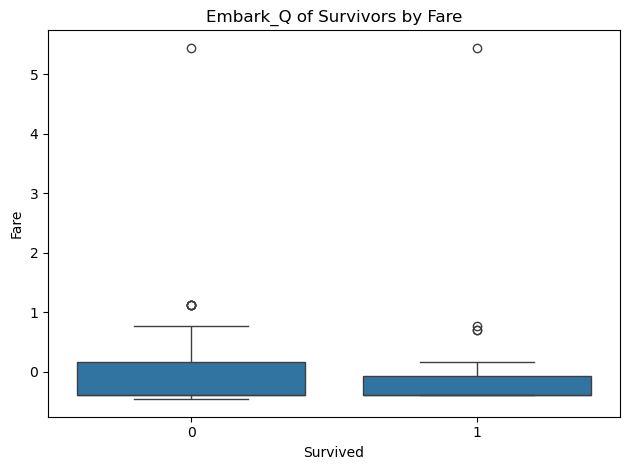

total people:644
mean: 27.079811801242233
median: 13.0


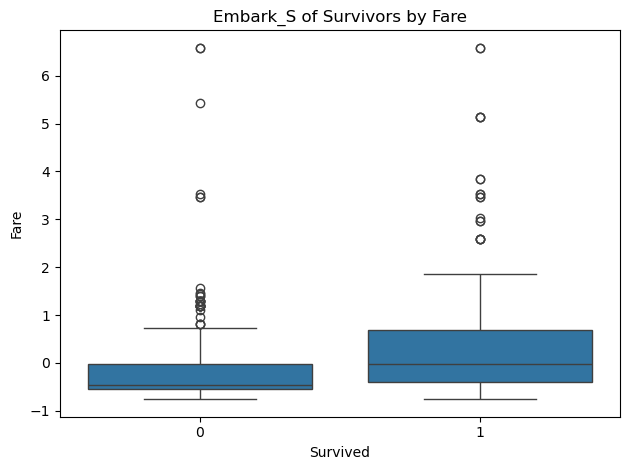

In [30]:
#分析Embarked與票價
Embark_C = titanic_df[titanic_df["Embarked"] == 'C']
Embark_Q = titanic_df[titanic_df["Embarked"] == 'Q']
Embark_S = titanic_df[titanic_df["Embarked"] == 'S']


print(f"total people:{len(Embark_C)}")
print("mean:", Embark_C["Fare"].mean())
print("median:", Embark_C["Fare"].median())

plt.figure()
sns.boxplot(x=Embark_C["Survived"], y=(Embark_C["Fare"] - np.mean(Embark_C["Fare"])) / np.std(Embark_C["Fare"]))

plt.title("Embark_C of Survivors by Fare")
plt.tight_layout()
plt.show()

print(f"total people:{len(Embark_Q)}")
print("mean:", Embark_Q["Fare"].mean())
print("median:", Embark_Q["Fare"].median())

plt.figure()
sns.boxplot(x=Embark_Q["Survived"], y=(Embark_Q["Fare"] - np.mean(Embark_Q["Fare"])) / np.std(Embark_Q["Fare"]))

plt.title("Embark_Q of Survivors by Fare")
plt.tight_layout()
plt.show()

print(f"total people:{len(Embark_S)}")
print("mean:", Embark_S["Fare"].mean())
print("median:", Embark_S["Fare"].median())


plt.figure()
sns.boxplot(x=Embark_S["Survived"], y=(Embark_S["Fare"] - np.mean(Embark_S["Fare"])) / np.std(Embark_S["Fare"]))

plt.title("Embark_S of Survivors by Fare")
plt.tight_layout()
plt.show()